Exercise 24

4.1 1D Harmonic oscillator
Demonstrating that a molecular dynamics apprach with a terhmostat results in the same thermal ensemble of position observations as did the Metropolis MC approach.

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import builtins

m = 1
omega = 1 
k = m * omega ** 2  # spring constant
kT_values = [0.05, 0.1, 0.15, 0.2]  # Different values for kT

x_min = -3
x_max = 3
x_points = 400

bin_number = 50

# Boltzmann distribution function based on the harmonic potential
def V(x, k, x0):
    return 0.5 * k * (x - x0) ** 2

def P(x, k, x0, kT):
    return np.exp(-V(x, k, x0) / kT)

# Metropolis sampling function
def metropolis_sampling(x0, N, Delta, kT):
    samples = []
    current_x = x0
    for _ in builtins.range(N):
        # Propose new x' using random walk: x' = x + delta * N(0,1)
        RNDn = np.random.randn()  # random distribution "randn"
        proposed_x = current_x + Delta * RNDn

        # Acceptance probability (min(1, P(x') / P(x)))
        acceptance_prob = min(1, P(proposed_x, k, x0, kT) / P(current_x, k, x0, kT))

        # Accept or reject the new position
        if np.random.rand() < acceptance_prob:
            current_x = proposed_x  # Accept the move

        # Store the current position
        samples.append(current_x)

    return np.array(samples)


C:\Users\jacob\AppData\Local\Temp\ipykernel_8304\2313263850.py:15: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  axs[i].plot(xs, V(xs, k, x0) / np.trapz(P(xs, k, x0, kT), xs), label="Boltzmann distribution", color="blue")


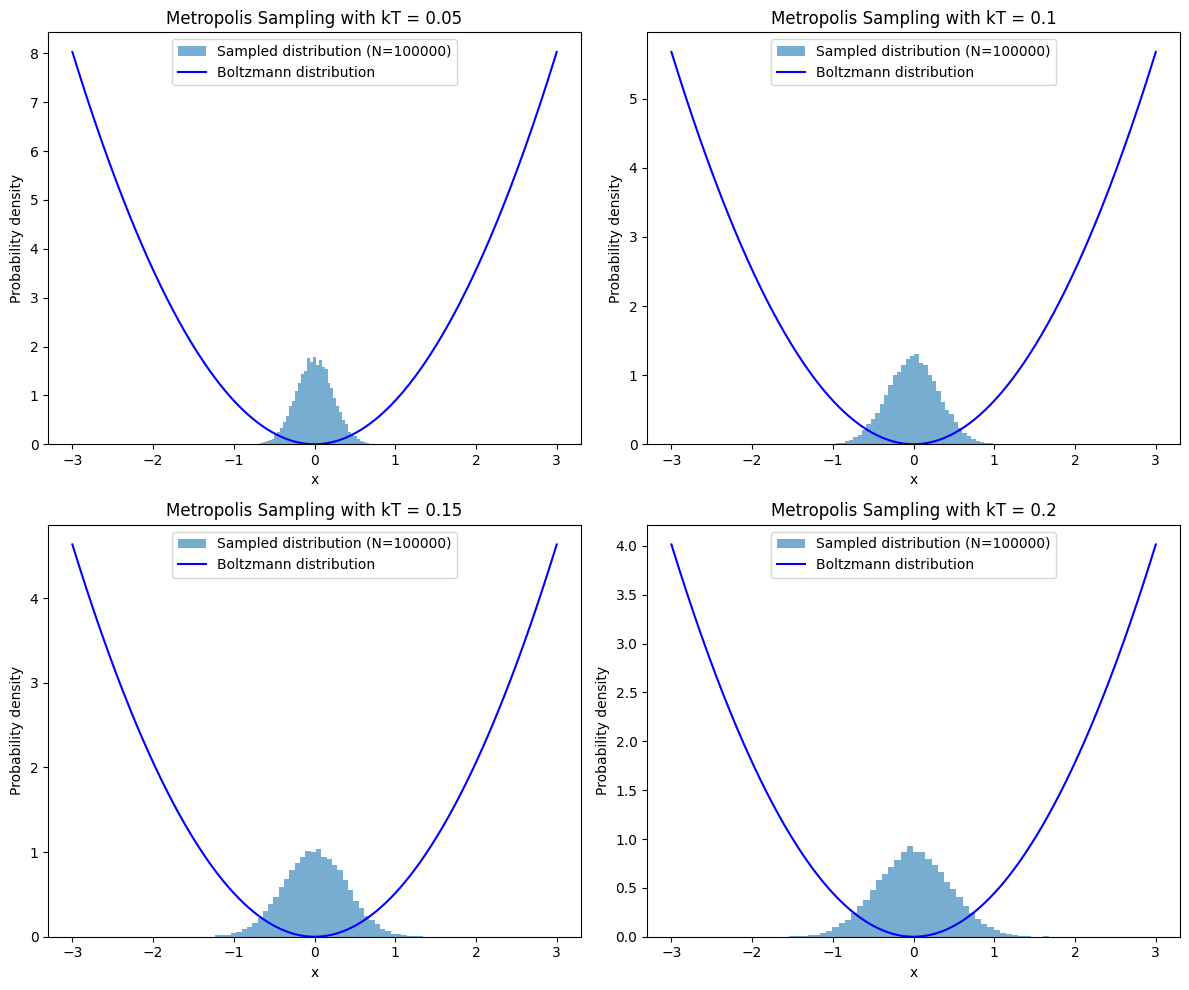

In [18]:
# Initial position and parameters for sampling
x0 = 0.0
N = 100000
Delta = 1

fig, axs = plt.subplots(2, 2, figsize=(12, 10))  # Create a 2x2 grid of subplots
axs = axs.flatten()  # Flatten the 2D array of axes

# Loop through each kT value and create a subplot
for i, kT in enumerate(kT_values):
    xs = np.linspace(x_min, x_max, x_points)
    samples = metropolis_sampling(x0, N, Delta, kT)
    
    axs[i].hist(samples, bins=bin_number, density=True, label=f"Sampled distribution (N={N})", alpha=0.6)
    axs[i].plot(xs, V(xs, k, x0) / np.trapz(P(xs, k, x0, kT), xs), label="Boltzmann distribution", color="blue")

    axs[i].set_xlabel('x')
    axs[i].set_ylabel('Probability density')
    axs[i].set_title(f'Metropolis Sampling with kT = {kT}')
    axs[i].legend()

plt.tight_layout()
plt.show()
